In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a wikipedia page title
    '''

    params = {
    'action': 'query',
    'format': 'json', # request json formatted content
    'titles': title, # title of the wikipedia page
    'prop': 'extracts',
    'explaintext': True
    }

    # send a request to the wikipedia api
    response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params= params
    ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))


    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"
    # first get the text from the wikipedia page with

In [2]:
text = wikipedia_page('Earth').lower()

## Create the Word Cloud

In [10]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
random_state = 8,
normalize_plurals = False,
width = 600,
height= 300,
max_words = 300,
stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

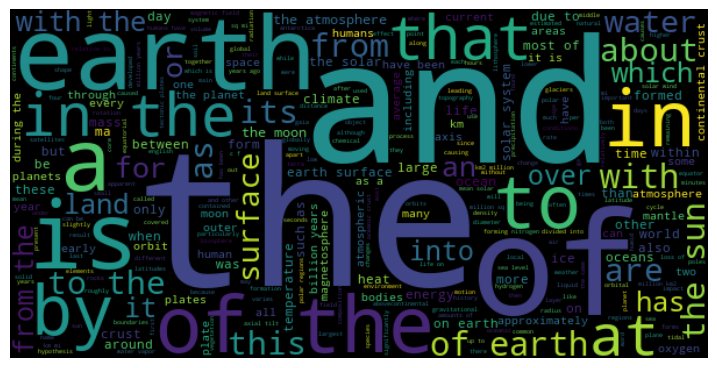

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

## Count Word Frequencies

In [3]:
# Print the beginning of the text
print(text[:200] + '')

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface w...


In [4]:
from collections import Counter

# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

In [5]:
word_counts

Counter({'the': 709,
         'of': 364,
         'and': 281,
         'is': 176,
         'to': 166,
         'in': 149,
         'a': 139,
         "earth's": 114,
         'with': 77,
         'by': 76,
         'as': 72,
         'from': 70,
         'earth': 69,
         'at': 58,
         'that': 58,
         'are': 49,
         'surface': 46,
         'about': 43,
         'it': 42,
         'this': 41,
         'solar': 40,
         'its': 40,
         'on': 40,
         'has': 37,
         'water': 36,
         'which': 36,
         'million': 36,
         'have': 35,
         'for': 32,
         'into': 32,
         'an': 31,
         'or': 31,
         'most': 28,
         'crust': 27,
         'life': 27,
         'land': 26,
         'sun': 25,
         'than': 25,
         'other': 25,
         'been': 25,
         'be': 24,
         'over': 24,
         'atmosphere': 23,
         'also': 21,
         'was': 20,
         'ocean': 19,
         'such': 19,
         'moon': 

In [6]:
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

the:  	709 
of:  	364 
and:  	281 
is:  	176 
to:  	166 
in:  	149 
a:  	139 
earth's:  	114 
with:  	77 
by:  	76 
as:  	72 
from:  	70 
earth:  	69 
at:  	58 
that:  	58 
are:  	49 
surface:  	46 
about:  	43 
it:  	42 
this:  	41 


In [7]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

In [12]:
words_without_stopwords

['earth',
 'third',
 'planet',
 'sun',
 'only',
 'astronomical',
 'object',
 'known',
 'harbor',
 'life.',
 'enabled',
 'earth',
 'being',
 'water',
 'world,',
 'only',
 'one',
 'solar',
 'system',
 'sustaining',
 'liquid',
 'surface',
 'water.',
 'almost',
 'all',
 "earth's",
 'water',
 'contained',
 'global',
 'ocean,',
 'covering',
 '70.8%',
 "earth's",
 'crust.',
 'remaining',
 '29.2%',
 "earth's",
 'crust',
 'land,',
 'most',
 'which',
 'located',
 'form',
 'continental',
 'landmasses',
 'within',
 'one',
 'hemisphere,',
 "earth's",
 'land',
 'hemisphere.',
 'most',
 "earth's",
 'land',
 'somewhat',
 'humid',
 'covered',
 'vegetation,',
 'while',
 'large',
 'sheets',
 'ice',
 "earth's",
 'polar',
 'deserts',
 'retain',
 'more',
 'water',
 'than',
 "earth's",
 'groundwater,',
 'lakes,',
 'rivers',
 'atmospheric',
 'water',
 'combined.',
 "earth's",
 'crust',
 'consists',
 'slowly',
 'moving',
 'tectonic',
 'plates,',
 'which',
 'interact',
 'produce',
 'mountain',
 'ranges,',
 'vol

In [8]:
Counter(words_without_stopwords).most_common(20)

[("earth's", 114),
 ('earth', 69),
 ('surface', 46),
 ('about', 43),
 ('it', 42),
 ('solar', 40),
 ('on', 40),
 ('has', 37),
 ('water', 36),
 ('which', 36),
 ('million', 36),
 ('have', 35),
 ('into', 32),
 ('or', 31),
 ('most', 28),
 ('crust', 27),
 ('life', 27),
 ('land', 26),
 ('sun', 25),
 ('than', 25)]

In [12]:
print(list(WordCloud().stopwords)[:20])

['in', "when's", 'at', 'been', 'www', 'the', 'who', 'because', 'its', "we'd", "weren't", 'like', 'he', 'those', 'of', 'more', 'very', 'are', 'above', 'that']


## Apply Tokenization Techniques

In [13]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Tokenize the sentence
tokens = WordPunctTokenizer().tokenize("Let's eat your soup, Grandpa.")

In [15]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Get the text from the Earth wikipedia page
text = wikipedia_page('Earth')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

[('the', 647), (',', 590), ('.', 492), ('of', 362), ('and', 286), ('Earth', 257), ('is', 178), ('to', 166), ('s', 159), ("'", 158), ('in', 142), ('a', 139), ('(', 108), ('The', 99), ('-', 78), ('with', 76), ('by', 72), ('from', 69), ('as', 67), ('surface', 62)]


In [19]:
text

'Earth is the third planet from the Sun and the only astronomical object known to harbor life. This is enabled by Earth being a water world, the only one in the Solar System sustaining liquid surface water. Almost all of Earth\'s water is contained in its global ocean, covering 70.8% of Earth\'s crust. The remaining 29.2% of Earth\'s crust is land, most of which is located in the form of continental landmasses within one hemisphere, Earth\'s land hemisphere. Most of Earth\'s land is somewhat humid and covered by vegetation, while large sheets of ice at Earth\'s polar deserts retain more water than Earth\'s groundwater, lakes, rivers and atmospheric water combined. Earth\'s crust consists of slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. Earth has a liquid outer core that generates a magnetosphere capable of deflecting most of the destructive solar winds and cosmic radiation.\nEarth has a dynamic atmosphere, which sustains Earth\'s 

In [18]:
tokens

['Earth',
 'is',
 'the',
 'third',
 'planet',
 'from',
 'the',
 'Sun',
 'and',
 'the',
 'only',
 'astronomical',
 'object',
 'known',
 'to',
 'harbor',
 'life',
 '.',
 'This',
 'is',
 'enabled',
 'by',
 'Earth',
 'being',
 'a',
 'water',
 'world',
 ',',
 'the',
 'only',
 'one',
 'in',
 'the',
 'Solar',
 'System',
 'sustaining',
 'liquid',
 'surface',
 'water',
 '.',
 'Almost',
 'all',
 'of',
 'Earth',
 "'",
 's',
 'water',
 'is',
 'contained',
 'in',
 'its',
 'global',
 'ocean',
 ',',
 'covering',
 '70',
 '.',
 '8',
 '%',
 'of',
 'Earth',
 "'",
 's',
 'crust',
 '.',
 'The',
 'remaining',
 '29',
 '.',
 '2',
 '%',
 'of',
 'Earth',
 "'",
 's',
 'crust',
 'is',
 'land',
 ',',
 'most',
 'of',
 'which',
 'is',
 'located',
 'in',
 'the',
 'form',
 'of',
 'continental',
 'landmasses',
 'within',
 'one',
 'hemisphere',
 ',',
 'Earth',
 "'",
 's',
 'land',
 'hemisphere',
 '.',
 'Most',
 'of',
 'Earth',
 "'",
 's',
 'land',
 'is',
 'somewhat',
 'humid',
 'and',
 'covered',
 'by',
 'vegetation',
 

### Tokenize on Characters or Syllables

In [16]:
# example of character tokenization
char_tokens = [ c for c in text ]

# print the 20 most commons characters
print(Counter(char_tokens).most_common(10))

[(' ', 9029), ('e', 5323), ('t', 4184), ('a', 4071), ('i', 3272), ('o', 3217), ('r', 3071), ('n', 3028), ('s', 3009), ('h', 2230)]


### Tokenize on N-Grams

In [17]:
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# Only keep the bigrams 
bigrams = [w for w in  ngrams(tokens,n=2)]

print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [18]:
bi_tokens = ['_'.join(w) for w in bigrams]
print(bi_tokens)

['How_much', 'much_wood', 'wood_would', 'would_a', 'a_woodchuck', 'woodchuck_chuck', 'chuck_if', 'if_a', 'a_woodchuck', 'woodchuck_could', 'could_chuck', 'chuck_wood', 'wood_?']


### Stem Words (Remove the Suffix of a Word)

In [19]:
# Import tokenizer, stemmer and stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Get the text from the Wikipedia Earth page
# (see chap 1 for the wikipedia_page() function)
text    = wikipedia_page('Earth').lower()

# Tokenize as usual
tokens  = WordPunctTokenizer().tokenize(text)

# Filter out stopwords
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

# Now, instantiate a stemmer
ps = PorterStemmer()

# and stem the tokens
stems   = [ps.stem(tk) for tk in tokens ]

In [22]:
stems

['earth',
 'third',
 'planet',
 'sun',
 'astronom',
 'object',
 'known',
 'harbor',
 'life',
 '.',
 'enabl',
 'earth',
 'water',
 'world',
 ',',
 'one',
 'solar',
 'system',
 'sustain',
 'liquid',
 'surfac',
 'water',
 '.',
 'almost',
 'earth',
 "'",
 'water',
 'contain',
 'global',
 'ocean',
 ',',
 'cover',
 '70',
 '.',
 '8',
 '%',
 'earth',
 "'",
 'crust',
 '.',
 'remain',
 '29',
 '.',
 '2',
 '%',
 'earth',
 "'",
 'crust',
 'land',
 ',',
 'locat',
 'form',
 'continent',
 'landmass',
 'within',
 'one',
 'hemispher',
 ',',
 'earth',
 "'",
 'land',
 'hemispher',
 '.',
 'earth',
 "'",
 'land',
 'somewhat',
 'humid',
 'cover',
 'veget',
 ',',
 'larg',
 'sheet',
 'ice',
 'earth',
 "'",
 'polar',
 'desert',
 'retain',
 'water',
 'earth',
 "'",
 'groundwat',
 ',',
 'lake',
 ',',
 'river',
 'atmospher',
 'water',
 'combin',
 '.',
 'earth',
 "'",
 'crust',
 'consist',
 'slowli',
 'move',
 'tecton',
 'plate',
 ',',
 'interact',
 'produc',
 'mountain',
 'rang',
 ',',
 'volcano',
 ',',
 'earthqua

In [21]:
tokens

['earth',
 'third',
 'planet',
 'sun',
 'astronomical',
 'object',
 'known',
 'harbor',
 'life',
 '.',
 'enabled',
 'earth',
 'water',
 'world',
 ',',
 'one',
 'solar',
 'system',
 'sustaining',
 'liquid',
 'surface',
 'water',
 '.',
 'almost',
 'earth',
 "'",
 'water',
 'contained',
 'global',
 'ocean',
 ',',
 'covering',
 '70',
 '.',
 '8',
 '%',
 'earth',
 "'",
 'crust',
 '.',
 'remaining',
 '29',
 '.',
 '2',
 '%',
 'earth',
 "'",
 'crust',
 'land',
 ',',
 'located',
 'form',
 'continental',
 'landmasses',
 'within',
 'one',
 'hemisphere',
 ',',
 'earth',
 "'",
 'land',
 'hemisphere',
 '.',
 'earth',
 "'",
 'land',
 'somewhat',
 'humid',
 'covered',
 'vegetation',
 ',',
 'large',
 'sheets',
 'ice',
 'earth',
 "'",
 'polar',
 'deserts',
 'retain',
 'water',
 'earth',
 "'",
 'groundwater',
 ',',
 'lakes',
 ',',
 'rivers',
 'atmospheric',
 'water',
 'combined',
 '.',
 'earth',
 "'",
 'crust',
 'consists',
 'slowly',
 'moving',
 'tectonic',
 'plates',
 ',',
 'interact',
 'produce',
 'mou

In [28]:
import numpy as np
np.random.choice(stems, size = 10)

array(['cover', 'current', '.', 'structur', 'four', '.', 'geolog', '.',
       ',', '):'], dtype='<U15')

### Lemmatize Words (Reduce Words to a Canonical Form)

#### Tokenize and Lemmatize With spaCy

In [23]:
import spacy

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# And parse the sentence (taken from which movie?)
doc = nlp("Roads? Where we're going we don't need roads!")

# print the tokens
for token in doc:
   print(token)

Roads
?
Where
we
're
going
we
do
n't
need
roads
!


#### Tokenize With spaCy

In [24]:
# Import and load the model
import spacy
nlp = spacy.load("en_core_web_sm")

# parse the text
doc = nlp("All aboard! \t Train NXH123 departs from platform 22 at 3:16 sharp.")

# extract information on each token
for token in doc:
   print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

All False False False False
aboard False False False False
! False True False False
	  True False False False
Train False False False False
NXH123 False False True False
departs False False False False
from False False False False
platform False False False False
22 False False False True
at False False False False
3:16 False False False False
sharp False False False False
. False True False False


#### Lemmatize With spaCy

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("I came in and met with her teammates at the meeting.")

# print the lemma of each token
for token in doc:
   print(f"{token.text:>10}\t {token.lemma_} ")

         I	 I 
      came	 come 
        in	 in 
       and	 and 
       met	 meet 
      with	 with 
       her	 her 
 teammates	 teammate 
        at	 at 
       the	 the 
   meeting	 meeting 
         .	 . 


### Identify the Nature of a Word With Part-of-Speech Tagging

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("If you don't know where you are going any road can take you there.")

# print the nature of each token
for token in doc:
   print(f"{token.text}\t {token.pos_} ")

If	 SCONJ 
you	 PRON 
do	 AUX 
n't	 PART 
know	 VERB 
where	 SCONJ 
you	 PRON 
are	 AUX 
going	 VERB 
any	 DET 
road	 NOUN 
can	 AUX 
take	 VERB 
you	 PRON 
there	 ADV 
.	 PUNCT 


In [27]:
doc = nlp("Grace me no grace, nor uncle me no uncle")
for t in doc: print(t, t.pos_)

Grace VERB
me PRON
no DET
grace NOUN
, PUNCT
nor CCONJ
uncle VERB
me PRON
no DET
uncle NOUN


### Extract Real-World Objects With Named Entity Recognition

In [29]:
import requests
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# text from Alice in Wonderland
r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')

# remove the footer and parse the text
doc = nlp(r.text.split("*** END")[0])

# Find all the 'persons' in the text
persons = []
# For each entity in the doc 
for ent in doc.ents:
    # if the entity is a person
    if ent.label_ == 'PERSON':
        # add to the list of persons
        persons.append(ent.text)

# note we could have written the last bit in one line with
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# list the 12 most common ones
Counter(persons).most_common(12)

[('Alice', 341),
 ('Queen', 54),
 ('Hatter', 53),
 ('Mouse', 27),
 ('â\x80\x9cIt', 9),
 ('Bill', 9),
 ('Lory', 7),
 ('Iâ\x80\x99d', 5),
 ('â\x80\x9cif', 5),
 ('Knave', 5),
 ('Gryphon', 5),
 ('William', 4)]

In [33]:
doc

ï»¿The Project Gutenberg eBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down t

In [32]:
doc.ents

(ï»¿The,
 Gutenberg eBook,
 Aliceâs Adventures,
 Wonderland,
 Lewis Carroll,
 eBook,
 the United States,
 eBook,
 the United States,
 eBook,
 Aliceâs Adventures,
 Wonderland,
 Lewis Carroll,
 January, 1991,
 eBook #11,
 October 12, 2020,
 English,
 Arthur DiBianca,
 David Widger,
 ADVENTURES,
 Wonderland,
 Lewis Carroll,
 3.0,
 Caucus-Race,
 Caterpillar,
 Pepper
  CHAPTER VII,
 A Mad Tea-Party,
 The Queenâs Croquet-Ground,
 Tarts,
 Aliceâs Evidence,
 Alice,
 Alice,
 Alice,
 Rabbit,
 Alice,
 Alice,
 Alice,
 First,
 MARMALADEâ,
 Alice,
 house!â,
 Down,
 four thousand miles,
 Alice,
 Latitude or Longitude Iâve,
 Alice,
 Latitude,
 Longitude,
 earth,
 New Zealand,
 Australia?â,
 Down,
 Alice,
 Iâm,
 Alice,
 âDo,
 bats?â,
 âDo,
 Dinah,
 Dinah,
 Alice,
 the White Rabbit,
 Alice,
 âOh,
 late itâs getting!â She,
 Alice,
 Aliceâs,
 first,
 one,
 second,
 about fifteen inches,
 Alice,
 Alice,
 âit,
 Alice,
 half,
 Alice,
 Alice,
 âNo,
 Alice,
 Alice,
 only ten

In [31]:
rabbit_ner = [(ent.text, ent.label_) for ent in doc.ents if "Rabbit" in ent.text]
Counter(rabbit_ner).most_common(10)

[(('the White Rabbit', 'ORG'), 5),
 (('Rabbit', 'ORG'), 4),
 (('the White Rabbit', 'FAC'), 3),
 (('Rabbitâ\x80\x99s', 'ORG'), 2),
 (('Rabbitâ\x80\x99s', 'PERSON'), 1),
 (('The Rabbit Sends', 'WORK_OF_ART'), 1),
 (('the White Rabbit', 'WORK_OF_ART'), 1),
 (('the White\r\nRabbit', 'ORG'), 1),
 (('The White Rabbit', 'WORK_OF_ART'), 1)]

## Quiz

In [83]:
import requests
# download the text
result = requests.get('http://www.gutenberg.org/files/36/36-0.txt')

# This line removes the header and footer
text = result.text[860:].split("*** END")[0]

# This line removes the (weird) non ascii characters
#text = text.encode('ascii',errors='ignore').decode('utf-8')

In [87]:
text

'But who shall dwell in these worlds if they be inhabited?\r\n    . . . Are we or they Lords of the World? . . . And\r\n    how are all things made for man?\r\n                    KEPLER (quoted in _The Anatomy of Melancholy_)\r\n\r\n\r\n\r\n\r\nContents\r\n\r\n\r\n BOOK ONE.THE COMING OF THE MARTIANS\r\n\r\n I. THE EVE OF THE WAR.\r\n II. THE FALLING STAR.\r\n III. ON HORSELL COMMON.\r\n IV. THE CYLINDER OPENS.\r\n V. THE HEAT-RAY.\r\n VI. THE HEAT-RAY IN THE CHOBHAM ROAD.\r\n VII. HOW I REACHED HOME.\r\n VIII. FRIDAY NIGHT.\r\n IX. THE FIGHTING BEGINS.\r\n X. IN THE STORM.\r\n XI. AT THE WINDOW.\r\n XII. WHAT I SAW OF THE DESTRUCTION OF WEYBRIDGE AND SHEPPERTON.\r\n XIII. HOW I FELL IN WITH THE CURATE.\r\n XIV. IN LONDON.\r\n XV. WHAT HAD HAPPENED IN SURREY.\r\n XVI. THE EXODUS FROM LONDON.\r\n XVII. THE THUNDER CHILD.\r\n\r\n BOOK TWO.THE EARTH UNDER THE MARTIANS\r\n\r\n I. UNDER FOOT.\r\n II. WHAT WE SAW FROM THE RUINED HOUSE.\r\n III. THE DAYS OF IMPRISONMENT.\r\n IV. THE DEATH OF

In [84]:
text = text.encode('ascii',errors='ignore').decode('utf-8')

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33623\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# parse the text
doc = nlp(text)

# extract information on each token
for token in doc:
   print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

In [66]:
from collections import Counter

# we transform the text into a list of words 
# by splitting over the space character ' '
text = text.lower()
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

In [73]:
def chartokenizer(word):
    # extracts all the characters in a given word
    return [c for c in word]

In [74]:
all_char = list()

for w in word_list:
    all_char += chartokenizer(w)



In [76]:
len(all_char)

287400

In [77]:
len(set(all_char))

46

In [80]:
']' in all_char

False

In [72]:
word_list

['but',
 'who',
 'shall',
 'dwell',
 'in',
 'these',
 'worlds',
 'if',
 'they',
 'be',
 'inhabited?\r\n',
 '',
 '',
 '',
 '.',
 '.',
 '.',
 'are',
 'we',
 'or',
 'they',
 'lords',
 'of',
 'the',
 'world?',
 '.',
 '.',
 '.',
 'and\r\n',
 '',
 '',
 '',
 'how',
 'are',
 'all',
 'things',
 'made',
 'for',
 'man?\r\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'kepler',
 '(quoted',
 'in',
 '_the',
 'anatomy',
 'of',
 'melancholy_)\r\n\r\n\r\n\r\n\r\ncontents\r\n\r\n\r\n',
 'book',
 'one.the',
 'coming',
 'of',
 'the',
 'martians\r\n\r\n',
 'i.',
 'the',
 'eve',
 'of',
 'the',
 'war.\r\n',
 'ii.',
 'the',
 'falling',
 'star.\r\n',
 'iii.',
 'on',
 'horsell',
 'common.\r\n',
 'iv.',
 'the',
 'cylinder',
 'opens.\r\n',
 'v.',
 'the',
 'heat-ray.\r\n',
 'vi.',
 'the',
 'heat-ray',
 'in',
 'the',
 'chobham',
 'road.\r\n',
 'vii.',
 'how',
 'i',
 'reached',
 'home.\r\n',
 'viii.',
 'friday',
 'night.\r\n',
 'ix.',
 'the',
 'fighting',
 'begins

In [85]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
# instantiate the tokenizer and tokenize in one line
tokens = WordPunctTokenizer().tokenize(text)

In [86]:
Counter(tokens).most_common(20)

[('the', 4399),
 (',', 4134),
 ('.', 3141),
 ('and', 2358),
 ('of', 2284),
 ('a', 1529),
 ('I', 1264),
 ('to', 1157),
 ('in', 920),
 ('was', 850),
 ('that', 739),
 ('had', 565),
 ('it', 483),
 ('with', 435),
 ('my', 411),
 ('as', 402),
 ('at', 369),
 ('were', 368),
 ('on', 360),
 ('The', 346)]

In [91]:
most_com = Counter(tokens).most_common(10)

nb=0

for mc in most_com:
    nb+=mc[1]


In [93]:
len(tokens)

68579

In [94]:
100.0*nb/len(tokens)

32.132285393487805

In [95]:
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords

stopwords = stopwords.words("english")

In [96]:
words_without_stopwords = [ word for word in tokens if word not in stopwords ]

In [98]:
most_com_without_stopwords = Counter(words_without_stopwords).most_common(20)

In [99]:
most_com_without_stopwords

[(',', 4134),
 ('.', 3141),
 ('I', 1264),
 ('The', 346),
 ('-', 321),
 (';', 243),
 ('!', 202),
 ('upon', 171),
 ('one', 166),
 ('said', 166),
 ('It', 164),
 ('Martians', 163),
 ('came', 150),
 ('He', 145),
 ('people', 145),
 ('And', 130),
 ('towards', 128),
 ('saw', 127),
 ('?', 121),
 ('time', 120)]

In [110]:
import spacy
nlp = spacy.load("en_core_web_sm")



doc = nlp(text)

words_lem = [token.lemma_ for token in doc if (token.is_space==False) and (token.is_punct==False)]


In [112]:
words_lem_capit = [w for w in words_lem if w.capitalize() == w]

In [113]:
words_lem_capit

['Lords',
 'World',
 'Anatomy',
 'Melancholy',
 'Contents',
 'V.',
 'I',
 'X.',
 'I',
 'I',
 'I.',
 'V.',
 'X.',
 'I.',
 'Mars',
 'Mars',
 'I',
 '140,000,000',
 'Mars',
 'Mars',
 '35,000,000',
 'Mars',
 'Tasmanians',
 'Martians',
 'Martians',
 'Schiaparelli',
 'Mars',
 'Martians',
 '1894',
 'Lick',
 'Observatory',
 'Perrotin',
 'Nice',
 'August',
 '2',
 'I',
 'Mars',
 'Lavelle',
 'Java',
 'Daily',
 'Telegraph',
 'I',
 'I',
 'Ogilvy',
 'Ottershaw',
 'I',
 'I',
 'Ogilvy',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'Ogilvy',
 'I',
 'I',
 'Ogilvy',
 'Mars',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'Ogilvy',
 'Ottershaw',
 'Chertsey',
 'Mars',
 'I',
 'Mars',
 'Martians',
 'Mars',
 'I',
 'Martians',
 'I',
 'I',
 'Markham',
 'People',
 'I',
 '10,000,000',
 'I',
 'I',
 'Signs',
 'Zodiac',
 'Mars',
 'Chertsey',
 'Isleworth',
 'I',
 'Winchester',
 'Albin',
 'I',
 'Ottershaw',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'Berkshire',
 'Surrey',
 'Middlesex',
 'Ogilvy',
 'Horsell',
 'Ottershaw',
 'Wokin

In [114]:
most_com_without_stopwords = Counter(words_lem_capit).most_common(20)

In [115]:
most_com_without_stopwords 

[('I', 1540),
 ('Martians', 163),
 ('London', 56),
 ('Woking', 50),
 ('Martian', 48),
 ('Mars', 42),
 ('Heat', 36),
 ('Ray', 34),
 ('Hill', 29),
 ('Weybridge', 24),
 ('Horsell', 23),
 ('Street', 23),
 ('Ogilvy', 20),
 ('Sunday', 20),
 ('Thames', 20),
 ('God', 19),
 ('St.', 19),
 ('Chertsey', 18),
 ('Maybury', 18),
 ('Smoke', 16)]

In [118]:
persons = [ent.text for ent in doc.ents if ent.label_ in ['PERSON']]
locations = [ent.text for ent in doc.ents if ent.label_ in ['LOC']]
gpe = [ent.text for ent in doc.ents if ent.label_ in ['GPE']]


In [120]:
set(locations) - set(persons)

{'Asia',
 'Atlantic',
 'EARTH',
 'Earth',
 'East Barnet',
 'Hyde Park',
 'Kensington Gardens',
 'Mars',
 'New Barnet',
 'Regent Street',
 'Regents Park',
 'Richmond Hill',
 'Richmond Park',
 'Send',
 'Smiths',
 'Sparks',
 'Zoological Gardens',
 'earth',
 'the Black Smoke',
 'the Irish Sea',
 'the South-Eastern',
 'the Thames Valley'}

In [121]:
set(persons)-set(locations) 

{'Albert Hall',
 'Albin',
 'Baker',
 'Baker StreetPortman Square',
 'Barnet',
 'Beyond Victoria',
 'Blow',
 'Broadstairs',
 'Brompton',
 'Cardigan',
 'Chertsey',
 'Clapham',
 'Clapham Junction',
 'Crouch',
 'Daily Mail',
 'Daily Telegraph',
 'Dim',
 'Ditton',
 'Dyer',
 'Eden',
 'Edgware',
 'Ellen',
 'Elphinstone',
 'Elphinstonethat',
 'Epsom',
 'Epsom Downs',
 'Esher',
 'Euston',
 'Flutter',
 'Forthwith',
 'George',
 'Gomorrah',
 'Greengrocer',
 'Gregg',
 'Haggerston',
 'Halliford',
 'Hammersmith',
 'Hampton',
 'Heat-Ray',
 'Henderson',
 'Hendersons',
 'Humanity',
 'Hurrah',
 'Ill',
 'Isleworth',
 'Jack',
 'Java',
 'Keep',
 'Kew',
 'Kew Lodge',
 'Kewit',
 'Kilburn',
 'Lambeth',
 'Langham',
 'Lavelle',
 'Limehouse',
 'Londonward',
 'Lord Hilton',
 'Markham',
 'Marshall',
 'Martiansa',
 'Marvin',
 'Maybury Hill',
 'Miss Elphinstone',
 'Molesey',
 'Newhaven',
 'Northward',
 'Ockham',
 'Ogilvys',
 'Ottershaw',
 'Pit',
 'Push',
 'Putney',
 'Putney Common',
 'Putney Hill',
 'Quickly',
 'Ray'

In [124]:
gpe

['IV',
 'LONDON',
 'LONDON',
 'LONDON',
 'Nice',
 'Berkshire',
 'Woking',
 'Henderson',
 'London',
 'Henderson',
 'Henderson',
 'Henderson',
 'Henderson',
 'London',
 'Henderson',
 'England',
 'Henderson',
 'Maybury',
 'London',
 'Woking',
 'Woking',
 'London',
 'Woking',
 'Woking',
 'Henderson',
 'Woking',
 'Woking',
 'Henderson',
 'Ogilvys',
 'London',
 'Germany',
 'London',
 'Cardigan',
 'Woking',
 'Cardigan',
 'Stent',
 'Henderson',
 'the\r\nhill',
 'London',
 'Byfleet',
 'Woking',
 'Woking',
 'Maybury',
 'Pyrford',
 'Pyrford',
 'Pyrford',
 'Byfleet',
 'Byfleet',
 'Titan',
 'Woking',
 'Woking',
 'London',
 'Leatherheador',
 'Woking',
 'Woking',
 'Byfleet',
 'Shepperton',
 'Shepperton',
 'Wey',
 'Yonder',
 'Shepperton',
 'Laleham',
 'Shepperton',
 'London',
 'Lisbon',
 'Richmond',
 'London',
 'Halliford',
 'Walton',
 'Middlesex',
 'Sunbury',
 'Richmond',
 'Shepperton',
 'LONDON',
 'London',
 'Woking',
 'Woking',
 'London',
 'Byfleet',
 'Woking',
 'Woking',
 'Southampton',
 'London',

In [123]:
'Regents Park' in locations

True

In [2]:
import pandas as pd

# consider the following set of phrases
corpus = [
   '2 cups of flour',
   'replace the flour',
   'replace the keyboard in 2 minutes',
   'do you prefer Windows or Mac',
   'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix as a dataframe to show the tokens


vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [3]:
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1
4,0,0,0,1,0,1,1,0,1,1,0,0,0,0,2,0,0


In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/brown_corpus_extract_humor_science_fiction.csv"
df = pd.read_csv(url)

print(df.topic.value_counts())

topic
humor              1052
science_fiction     948
Name: count, dtype: int64


In [5]:
df

,topic,text
0,humor,"They were always leaping to light cigarettes, ..."
1,science_fiction,"No, the fish could eat their bodies for all th..."
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t..."
3,science_fiction,that is all I can tell you about them.
4,humor,"That's one thing I've never done , she said p..."
...,...,...
1995,humor,A news item described the launching of a ship ...
1996,science_fiction,"Time stood still for these people, and their l..."
1997,science_fiction,What shall we do with this one??
1998,science_fiction,"But, from our reading of the Western Talmud, w..."


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [7]:
def lemmatize(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc]

   return tokens

In [8]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

['these',
 'be',
 'the',
 'good',
 'time',
 ',',
 'leave',
 'your',
 'care',
 'behind',
 '.']

In [14]:
def lemmatize(text):

   doc = nlp(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [15]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))

In [16]:
df

,topic,text,processed_text
0,humor,"They were always leaping to light cigarettes, ...",leap light cigarette open car door fill plate ...
1,science_fiction,"No, the fish could eat their bodies for all th...",fish eat body Sturch care
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t...",fight pleasure beg B'dikkat check record tell ...
3,science_fiction,that is all I can tell you about them.,tell
4,humor,"That's one thing I've never done , she said p...",thing say promptly
...,...,...,...
1995,humor,A news item described the launching of a ship ...,news item describe launching ship complete ...
1996,science_fiction,"Time stood still for these people, and their l...",Time stand people load pleasure commingle shoc...
1997,science_fiction,What shall we do with this one??,shall
1998,science_fiction,"But, from our reading of the Western Talmud, w...",reading Western Talmud Urielites believe Forer...


In [17]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# vectorize the lemmatized text
X = cv.fit_transform(df.processed_text)
print(X)

  (0, 2538)	1
  (0, 2568)	1
  (0, 783)	1
  (0, 3082)	1
  (0, 662)	1
  (0, 1342)	1
  (0, 1694)	1
  (0, 3301)	1
  (0, 1910)	1
  (0, 2846)	2
  (0, 2629)	1
  (0, 1167)	1
  (0, 360)	2
  (0, 4027)	1
  (0, 637)	1
  (0, 3876)	1
  (0, 4028)	1
  (1, 1714)	1
  (1, 1419)	1
  (1, 518)	1
  (1, 4323)	1
  (1, 665)	1
  (2, 1691)	1
  (2, 3312)	1
  (2, 431)	1
  :	:
  (1996, 2749)	1
  (1996, 1384)	1
  (1996, 4020)	1
  (1996, 3672)	1
  (1996, 872)	1
  (1997, 3990)	1
  (1998, 2486)	1
  (1998, 443)	1
  (1998, 4089)	1
  (1998, 246)	1
  (1998, 3631)	1
  (1998, 3596)	1
  (1998, 3487)	1
  (1998, 1330)	1
  (1998, 1762)	1
  (1998, 4883)	1
  (1998, 4412)	1
  (1998, 4747)	1
  (1999, 518)	1
  (1999, 2497)	1
  (1999, 1108)	1
  (1999, 1754)	1
  (1999, 3357)	1
  (1999, 1761)	1
  (1999, 4740)	1


In [ ]:
def lemmatize(text):

   doc = nlp(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [19]:
# transform the topic from string to integer
df.loc[df.topic == 'humor', 'topic' ] = 0
df.loc[df.topic == 'science_fiction', 'topic' ] = 1

# define the target variable as 0 and 1s
y = df.topic.astype(int)

In [21]:
df

,topic,text,processed_text
0,0,"They were always leaping to light cigarettes, ...",leap light cigarette open car door fill plate ...
1,1,"No, the fish could eat their bodies for all th...",fish eat body Sturch care
2,1,"Fighting pleasure itself, he begged B'dikkat t...",fight pleasure beg B'dikkat check record tell ...
3,1,that is all I can tell you about them.,tell
4,0,"That's one thing I've never done , she said p...",thing say promptly
...,...,...,...
1995,0,A news item described the launching of a ship ...,news item describe launching ship complete ...
1996,1,"Time stood still for these people, and their l...",Time stand people load pleasure commingle shoc...
1997,1,What shall we do with this one??,shall
1998,1,"But, from our reading of the Western Talmud, w...",reading Western Talmud Urielites believe Forer...


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions
yhat = clf.predict(X)

# 4. score
print("Accuracy: ",accuracy_score(y, yhat))

Accuracy:  0.9385


In [23]:
corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [31]:
1/1.22314

0.8175678990140132

In [28]:
pipe.transform(corpus).toarray()

array([[0.38408524, 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.38408524, 0.        , 0.        ],
       [0.28108867, 0.6876236 , 0.        , 0.28108867, 0.53864762,
        0.28108867, 0.        , 0.        ],
       [0.31091996, 0.        , 0.        , 0.31091996, 0.        ,
        0.31091996, 0.59581303, 0.59581303],
       [0.38408524, 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.38408524, 0.        , 0.        ]])

In [26]:
pipe['count'].transform(corpus).toarray()

array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [27]:
pipe['count'].get_feature_names_out()

array(['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one'],
      dtype=object)

In [ ]:
# Mot flour

# tf(t,d) = 1
#|Number of documents that contain term t| = 2
# number of doc = 5
# tfidf(t,d,D) = 1*5/2

In [24]:
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,0.614189,0.000000,0.495524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.609818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609818,0.506204,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.516374,0.416607,0.000000,0.516374,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.345822,0.000000,0.000000
3,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.420669,0.420669,0.000000,0.000000,0.420669,0.420669
4,0.000000,0.000000,0.000000,0.405025,0.000000,0.326771,0.326771,0.000000,0.405025,0.405025,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000
